In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
n_qubits = 5
qc = QuantumCircuit(n_qubits)
qc.h(0)
for i in range(0, n_qubits-1):
    qc.cx(i, i+1)
    
qc.draw()

┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐               
q_1: ─────┤ X ├──■────────────
          └───┘┌─┴─┐          
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘

In [4]:
from qiskit.visualization import array_to_latex

simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = simulator.run(qobj).result()
final_state = result.get_statevector()

array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

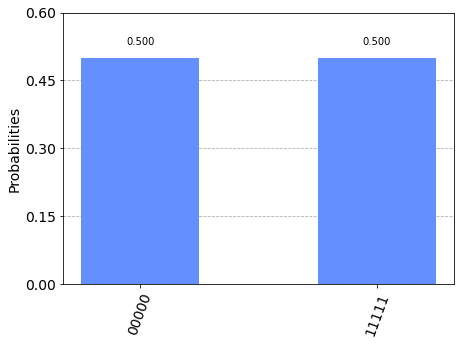

In [7]:
plot_histogram(result.get_counts())

#####################################################################################

In [26]:
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
from qiskit.providers.basicaer import QasmSimulatorPy

circuit = QuantumCircuit(2)

circuit.h(0)
circuit.cx(0, 1)
circuit.i(0)
circuit.h(1)
circuit.h(0)
#circuit.h(1)

circuit.draw()

┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ I ├┤ H ├
     └───┘┌─┴─┐├───┤└───┘
q_1: ─────┤ X ├┤ H ├─────
          └───┘└───┘

In [27]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
result = simulator.run(qobj).result()
final_state = result.get_statevector()

array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

qc.h(0)
qc.h(1)

qc.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [23]:
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = simulator.run(qobj).result()
final_state = result.get_statevector()

array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [3]:
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = simulator.run(qobj).result()
final_state = result.get_counts()

print(final_state)

{'00': 0.5, '01': 0.5}
